In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('data_train.csv')


In [3]:
data.workclass = data.workclass.where(data.workclass != "?").fillna("Private")
data.occupation = data.occupation.where(data.occupation != "?").fillna("Prof-specialty")
data.where(data == "?").count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

In [4]:
y_train = data['>50K,<=50K']
x_train = data.drop(['>50K,<=50K'],axis=1)

In [5]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [6]:
x_remake = pd.DataFrame(enc.fit_transform(x_train[['workclass','education','marital-status','occupation','relationship','race','sex']]))
x_train = x_train.drop(['workclass','education','marital-status','occupation','relationship','race','sex'],axis= 1)
x_train = x_train.join(x_remake)
x_train

c:\Users\neden\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,...,48,49,50,51,52,53,54,55,56,57
0,34,284843,9,594,0,60,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,40,190290,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,36,177858,13,0,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,22,184756,10,0,0,30,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,47,149700,13,15024,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,18,395567,9,0,0,40,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14730,62,94931,11,3411,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14731,34,261023,10,0,1651,38,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14732,26,195327,9,0,0,40,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [7]:
y_train

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
14729    <=50K
14730    <=50K
14731    <=50K
14732    <=50K
14733    <=50K
Name: >50K,<=50K, Length: 14734, dtype: object

In [8]:
y_train = y_train.where(y_train != "<=50K").fillna(0)
y_train = y_train.where(y_train != ">50K").fillna(1)
y_train

0        0
1        0
2        0
3        0
4        1
        ..
14729    0
14730    0
14731    0
14732    0
14733    0
Name: >50K,<=50K, Length: 14734, dtype: int64

In [9]:
###make it more diffrent
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train.values,y_train.values,shuffle=True)


In [10]:
depths = np.arange(3, 20)
array = []
for i in depths:
    forest =  RandomForestClassifier(max_depth=i,n_estimators=100)
    array.append(cross_val_score(forest,x_val,y_val,cv=3))

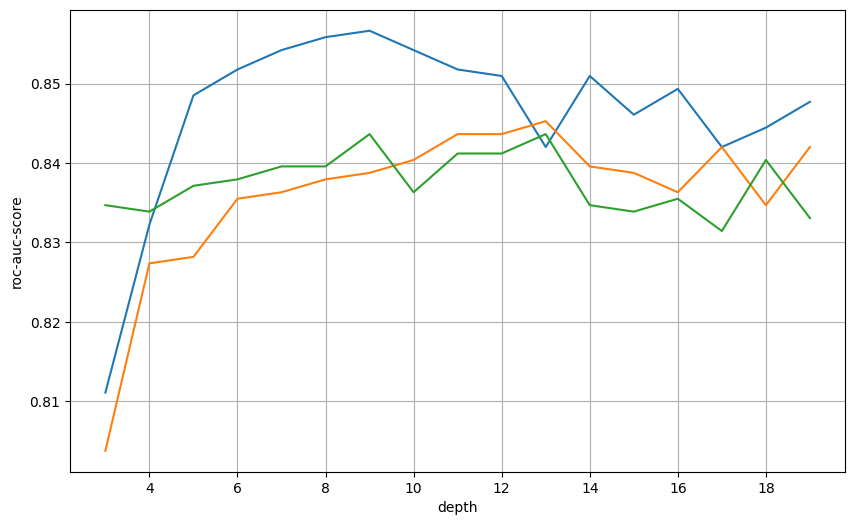

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), array)
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()

In [12]:
score_train = []
score_val = []

for i in depths:
    forest = RandomForestClassifier(n_estimators=100,max_depth=i)
    forest.fit(x_train,y_train)
    validation = forest.predict_proba(x_val)
    diagram = validation[:,1]
    test_y_pred_forest = forest.predict_proba(x_train)
    dd =  test_y_pred_forest[:,1]
    score_train.append(roc_auc_score(y_train,dd))
    score_val.append(roc_auc_score(y_val,diagram))

for i in depths:
    if score_val[i-3] == max(score_val):
        print(i)


14


In [13]:
forest = RandomForestClassifier(n_estimators=100,max_depth=14)
forest.fit(x_train,y_train)
validation = forest.predict_proba(x_val)
diagram = validation[:,1]
test_y_pred_forest = forest.predict_proba(x_train)
dd =  test_y_pred_forest[:,1]
score_train = (roc_auc_score(y_train,dd))
score_val = (roc_auc_score(y_val,diagram))

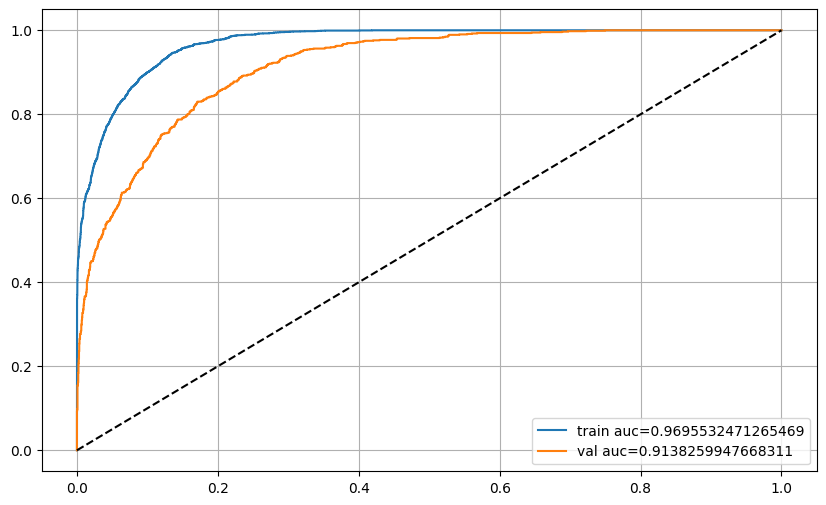

In [14]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train,dd)[:2], 
         label=f'train auc={score_train}')
plt.plot(*roc_curve(y_val, diagram)[:2],
         label=f'val auc={score_val}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

In [15]:
x_test = pd.read_csv('data_scoring.csv')
x_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15
1,31,Private,265706,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40
2,61,Self-emp-not-inc,244087,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52
3,60,Local-gov,232618,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40
4,56,Private,34626,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,1980,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40
1542,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45
1543,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40
1544,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40


In [16]:
x_test.workclass = x_test.workclass.where(x_test.workclass != "?").fillna("Private")
x_test.occupation = x_test.occupation.where(x_test.occupation != "?").fillna("Prof-specialty")
x_test.where(x_test == "?").count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [17]:
x_remake = pd.DataFrame(enc.transform(x_test[['workclass','education','marital-status','occupation','relationship','race','sex']]))
x_test = x_test.drop(['workclass','education','marital-status','occupation','relationship','race','sex'],axis= 1)
x_test = x_test.join(x_remake)
x_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,...,48,49,50,51,52,53,54,55,56,57
0,17,256173,6,0,0,15,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,31,265706,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,61,244087,9,0,0,52,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60,232618,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,56,34626,10,0,1980,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,25,514716,13,0,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1542,32,207668,13,15024,0,45,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1543,27,104457,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1544,59,268700,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
answer = forest.predict(x_test.values)

In [21]:
answer

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [20]:
with open('scoring_y_pred_forest.txt', "w") as f:
    f.write(', '.join([str(item) for item in answer]))